In [1]:
#coding: utf-8
import numpy as np
import pandas as pd

import jieba
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

## Define the sentiment analysis function
## Read in the dictionary file

In [2]:
#Open the dictionary file and return to the list
def open_dict(Dict = 'hahah', path=r'dict/'):
    path = path + '%s.txt' % Dict
    dictionary = open(path, 'r', encoding='UTF-8-sig')
    dict = []
    for word in dictionary:
        word = word.strip('\n')
        dict.append(word)
    return dict

def judgeodd(num):
    if (num % 2) == 0:
        return 'even'
    else:
        return 'odd'


deny_word = open_dict(Dict = '否定词', path= r'dict/')
posdict = open_dict(Dict = '激励', path= r'dict/')
negdict = open_dict(Dict = '责任', path= r'dict/')
degree_word = open_dict(Dict = '程度级别词语', path= r'dict/')

mostdict = degree_word[degree_word.index('extreme')+1 : degree_word.index('very')]
verydict = degree_word[degree_word.index('very')+1 : degree_word.index('more')]
moredict = degree_word[degree_word.index('more')+1 : degree_word.index('ish')]
ishdict = degree_word[degree_word.index('ish')+1 : degree_word.index('last')]

In [3]:
negdict

['核销',
 '深化改革',
 '廉洁观',
 '会计核算',
 '规程',
 '明确规定',
 '解聘',
 '执行',
 '颁布',
 '从严',
 '破产',
 '解除',
 '实时性',
 '问责制',
 '依法办事',
 '成本',
 '法制建设',
 '应改',
 '尽改',
 '程序',
 '健全',
 '维护',
 '履行',
 '机制',
 '约束',
 '强化',
 '监督',
 '规范',
 '提高效率',
 '贯彻时效',
 '操守',
 '企业信任',
 '督促检查',
 '督查',
 '惩戒',
 '不称职',
 '裁减人员',
 '整改',
 '克扣',
 '解除合同',
 '贯彻实施',
 '健全制度',
 '失效',
 '困难',
 '复查',
 '失密',
 '透露',
 '泄密',
 '集体领导',
 '密切相关',
 '贯彻',
 '征集',
 '严把',
 '有偿转让',
 '资本积累',
 '防范',
 '审核',
 '考核',
 '考察',
 '法制',
 '降维',
 '一票否决',
 '遏制',
 '核准',
 '经营风险',
 '被迫',
 '废止',
 '保管',
 '合规',
 '验资',
 '指令',
 '收缴',
 '违反规定',
 '代扣代缴',
 '廉政',
 '逐步完善',
 '擅离职守',
 '事故责任',
 '追讨',
 '法律责任',
 '整顿',
 '清偿债务',
 '颁布实施',
 '防范措施',
 '复核',
 '指示',
 '政策措施',
 '号令',
 '操作程序',
 '严格考核',
 '加强监督',
 '权限',
 '锐意改革',
 '冻结',
 '决策程序',
 '把关',
 '严格遵守',
 '明确要求',
 '责任意识',
 '清理',
 '拖欠',
 '事故',
 '扣分',
 '亟待解决',
 '以资抵债',
 '保持稳定',
 '群众监督',
 '违法犯罪',
 '重大案件',
 '惩治',
 '制度化',
 '减分',
 '欠缴',
 '加以改进',
 '履行职责']

## Sentiment functions in terms of sentences

In [4]:
def sentiment_sentence_list(dataset):
    if dataset[-1] == '。':
        dataset = dataset[:-1]
    seg_sentence = dataset.split('。')

    count1 = []
    count2 = []
    for sen in seg_sentence:  
        segtmp = jieba.lcut(sen, cut_all=False) 
        i = 0  
        a = 0  
        poscount = 0  
        poscount2 = 0  
        poscount3 = 0  
        negcount = 0
        negcount2 = 0
        negcount3 = 0
        for word in segtmp:
            if word in posdict:  
                poscount += 1
                c = 0
                for w in segtmp[a:i]:  
                    if w in mostdict:
                        poscount *= 4.0
                    elif w in verydict:
                        poscount *= 3.0
                    elif w in moredict:
                        poscount *= 2.0
                    elif w in ishdict:
                        poscount *= 0.5
                    elif w in deny_word:
                        c += 1
                if judgeodd(c) == 'odd':  
                    poscount *= -1.0
                    poscount2 += poscount
                    poscount = 0
                    poscount3 = poscount + poscount2 + poscount3
                    poscount2 = 0
                else:
                    poscount3 = poscount + poscount2 + poscount3
                    poscount = 0
                a = i + 1  

            elif word in negdict:  
                negcount += 1
                d = 0
                for w in segtmp[a:i]:
                    if w in mostdict:
                        negcount *= 4.0
                    elif w in verydict:
                        negcount *= 3.0
                    elif w in moredict:
                        negcount *= 2.0
                    elif w in ishdict:
                        negcount *= 0.5
                    elif w in degree_word:
                        d += 1
                if judgeodd(d) == 'odd':
                    negcount *= -1.0
                    negcount2 += negcount
                    negcount = 0
                    negcount3 = negcount + negcount2 + negcount3
                    negcount2 = 0
                else:
                    negcount3 = negcount + negcount2 + negcount3
                    negcount = 0
                a = i + 1

            elif word == '！' or word == '!':  
                for w2 in segtmp[::-1]:  
                    if w2 in posdict or negdict:
                        poscount3 += 2
                        negcount3 += 2
                        break
            i += 1  

            
            pos_count = 0
            neg_count = 0
            if poscount3 < 0 and negcount3 >= 0:
                neg_count = negcount3 - poscount3
                pos_count = 0
            elif poscount3 >= 0 and negcount3 < 0:
                pos_count = poscount3 - negcount3
                neg_count = 0
            elif poscount3 < 0 and negcount3 < 0:
                neg_count = -poscount3
                pos_count = -negcount3
            else:
                pos_count = poscount3
                neg_count = negcount3

            count1.append([pos_count, neg_count])
        count2.append(count1)
        count1 = []

    return count2


def sentiment_sentence(senti_sentence_list):
    sentence_sentiment = []
    for review in senti_sentence_list:
        sentence_array = np.array(review)
        #print(sentence_array)
        Pos = np.sum(sentence_array[:, 0])
        Neg = np.sum(sentence_array[:, 1])
        
        AvgPos = np.mean(sentence_array[:, 0])
        AvgPos = float('%.1f' % AvgPos)
        
        AvgNeg = np.mean(sentence_array[:, 1])
        AvgNeg = float('%.1f' % AvgNeg)
        
        StdPos = np.std(sentence_array[:, 0])
        StdPos = float('%.1f' % StdPos)
        
        StdNeg = np.std(sentence_array[:, 1])
        StdNeg = float('%.1f' % StdNeg)
        
        sentence_sentiment.append([Pos, Neg, AvgPos, AvgNeg, StdPos, StdNeg])
    return sentence_sentiment

# an article

## read

In [5]:
policy_all = pd.read_excel('data/policy_all_cutted1.xlsx')

## A part = 'Guangdong' txtNum = 0

In [6]:
part = '广东'
txtNum = 162
policy_part = policy_all[policy_all.province == part]
text = policy_part.iloc[txtNum,1]
title = policy_part.iloc[txtNum,4]
title

'广东省“十四五”节能减排实施方案'

In [7]:
print(type(text))
print(len(text))

<class 'str'>
11009


In [8]:
# 句子单位情感分值
s_score = pd.DataFrame(sentiment_sentence(sentiment_sentence_list(text)))
s_score

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.904 seconds.
Prefix dict has been built successfully.


,0,1,2,3,4,5
0,47.0,0.0,0.9,0.0,1.0,0.0
1,0.0,502.0,0.0,3.1,0.0,2.0
2,30.0,0.0,0.5,0.0,0.5,0.0
3,0.0,95.0,0.0,2.6,0.0,0.9
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
182,0.0,0.0,0.0,0.0,0.0,0.0
183,0.0,0.0,0.0,0.0,0.0,0.0
184,0.0,10.0,0.0,0.8,0.0,0.7
185,27.0,4.0,0.8,0.1,0.4,0.3


In [9]:
p_score = [s_score[0].sum(),s_score[1].sum()]
p_score

[1861.0, 2766.0]

## Histogram of Emotional Means

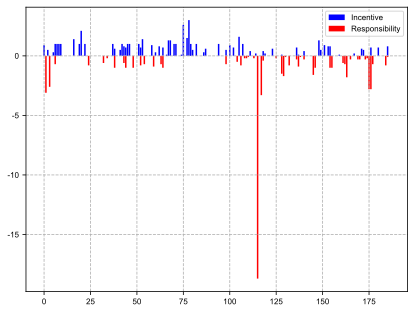

In [10]:
# plt.figure(figsize=[8, 12])
plt.rcParams['font.size'] = 8

plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial']

width_mm = 174
height_mm = min(234, width_mm * (6 / 8))   

width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

fig = plt.figure(figsize=(width_inch, height_inch))

index = np.arange(len(s_score.loc[:,0]))
plt.bar(
    index, 
    s_score.loc[:,2], 
    width=0.8,
    color = 'blue'
)
plt.bar(
    index, 
    -s_score.loc[:,3],
    width=0.8,
    color = 'red'
)
plt.grid(linestyle='--')  

plt.legend(['Incentive', 'Responsibility'])
#plt.title("Opinions of the Communist Party of China Shandong Provincial Committee \nand the People's Government of Shandong Province \non Accelerating Industrial Adjustment and Revitalization")

filename = 'data/data/'+'Analysis of single-article policies in Shandong Province.svg'
plt.savefig(filename, dpi=600, bbox_inches='tight')

plt.show()

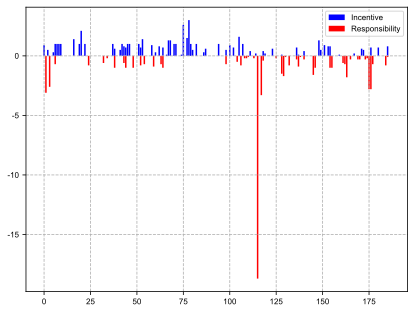

In [11]:
# plt.figure(figsize=[8, 12])

plt.rcParams['font.size'] = 8

plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial']

width_mm = 174
height_mm = min(234, width_mm * (6 / 8))  

width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

fig = plt.figure(figsize=(width_inch, height_inch))

index = np.arange(len(s_score.loc[:,0]))
plt.bar(
    index, 
    s_score.loc[:,2], 
    width=0.8,
    color = 'blue'
)
plt.bar(
    index, 
    -s_score.loc[:,3],
    width=0.8,
    color = 'red'
)
plt.grid(linestyle='--')  

plt.legend(['Incentive', 'Responsibility'])
#plt.title("The Implementation Plan for Energy Conservation and Emission Reduction in \nGuangdong Province during the 14th Five-Year Plan Period")
          
filename = 'data/data/'+'Analysis of single-article policies in Guangdong Province.svg'
plt.savefig(filename, dpi=600, bbox_inches='tight')

plt.show()

# a province

## Processing data

In [12]:
policy_all = pd.read_excel('data/data/policy_all_cutted.xlsx')

In [13]:
part = '甘肃'
policy_part = policy_all[policy_all.province==part]

In [14]:
print(policy_part.shape)         
policy_part.head()       

(0, 56)


,path,content,province,year,title,ID,A,B,C,D,...,content_cutted,C1,C2,C3,C4,C5,C6,C7,C8,C9


In [15]:
p_score_part = pd.DataFrame(columns=('Pos', 'Neg', 'AvgPos','AvgNeg', 'StdPos', 'StdNeg'))
for i in range(len(policy_part['content'])):
    text = policy_part.iloc[i,1]
    # 句子单位情感分值
    s_score = pd.DataFrame(sentiment_sentence(sentiment_sentence_list(text)))
    #print(s_score)
    # 篇章单位情感分值
    p_score = pd.Series({'Pos':s_score[0].sum(),
                    'Neg':s_score[1].sum(),
                    'AvgPos':round(s_score[0].mean(), 4),
                    'AvgNeg':round(s_score[1].mean(),4),
                    'StdPos':round(s_score[0].std(),4),
                    'StdNeg':round(s_score[1].std(),4)})
    p_score_part = p_score_part.append(p_score,ignore_index=True) 
p_score_part.index=policy_part.index 
# p_score_part

In [16]:
# Save
sentiment_part = policy_part.join(p_score_part)
filename = 'data/data/sentiment_'+part+'.xlsx'
sentiment_part.to_excel(filename, encoding='utf_8_sig', index=False) 

## call data

In [17]:
part = '甘肃'
filename = 'data/sentiment_'+str(part)+'.xlsx'
sentiment_part = pd.read_excel(filename)

## Histogram of sentiments in a province - mean

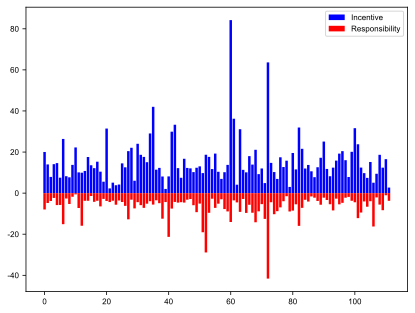

In [18]:
# plt.figure(figsize=[8, 12])
plt.rcParams['font.size'] = 8

plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial']

width_mm = 174
height_mm = min(234, width_mm * (6 / 8))  

width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

fig = plt.figure(figsize=(width_inch, height_inch))

index = np.arange(len(sentiment_part))
plt.bar(
    index, 
    sentiment_part['AvgPos'], 
    width=0.8,
    color = 'blue'
)
plt.bar(
    index, 
    -sentiment_part['AvgNeg'],
    width=0.8,
    color = 'red'
)

# plt.yticks(index, s_score.index)
# plt.yticks([])  #去掉y轴
plt.legend(['Incentive', 'Responsibility'])
#plt.title("Polarity Analysis of 'Incentive-Responsibility' \nin Policies of Gansu Province - Mean Value")

filename = 'data/data/'+'Analysis of policies in Gansu Province.svg'
plt.savefig(filename, dpi=600, bbox_inches='tight')
plt.show()

# one year

## process

In [19]:
policy_all = pd.read_excel('data/data/policy_all_cutted.xlsx')

In [20]:
part = 2021
policy_part = policy_all[policy_all.year == part]

In [21]:
print(policy_part.shape)         
policy_part.head()        

(0, 56)


,path,content,province,year,title,ID,A,B,C,D,...,content_cutted,C1,C2,C3,C4,C5,C6,C7,C8,C9


In [22]:
p_score_part = pd.DataFrame(columns=('Pos', 'Neg', 'AvgPos','AvgNeg', 'StdPos', 'StdNeg'))
for i in range(len(policy_part['content'])):
    text = policy_part.iloc[i,1]

    s_score = pd.DataFrame(sentiment_sentence(sentiment_sentence_list(text)))

    p_score = pd.Series({'Pos':s_score[0].sum(),
                    'Neg':s_score[1].sum(),
                    'AvgPos':round(s_score[0].mean(),4),
                    'AvgNeg':round(s_score[1].mean(),4),
                    'StdPos':round(s_score[0].std(),4),
                    'StdNeg':round(s_score[1].std(),4)})
    p_score_part = p_score_part.append(p_score,ignore_index=True) 
p_score_part.index=policy_part.index 
# p_score_part

In [25]:
# Save
sentiment_part = policy_part.join(p_score_part)
filename = 'data/data/sentiment_'+str(part)+'.xlsx'
sentiment_part.to_excel(filename, encoding='utf_8_sig', index=False) 

## Call result data

In [26]:
part = 2021
filename = 'data/data/sentiment_'+str(part)+'.xlsx'
sentiment_part = pd.read_excel(filename)

## Histogram of sentiment for a given year - mean value

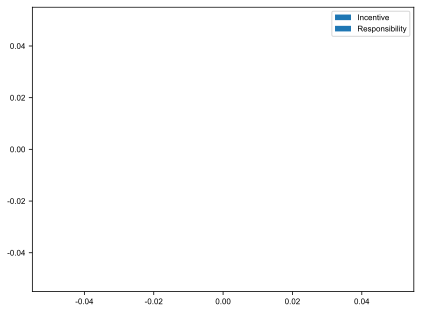

In [27]:
# plt.figure(figsize=[8, 12])
plt.rcParams['font.size'] = 8

plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial']

width_mm = 174
height_mm = min(234, width_mm * (6 / 8))  

width_inch = width_mm / 25.4
height_inch = height_mm / 25.4

fig = plt.figure(figsize=(width_inch, height_inch))
index = np.arange(len(sentiment_part))
plt.bar(
    index, 
    sentiment_part['AvgPos'], 
    width=0.8,
    color = 'blue'
)
plt.bar(
    index, 
    -sentiment_part['AvgNeg'],
    width=0.8,
    color = 'red'
)

# plt.yticks(index, s_score.index)
# plt.yticks([])  #去掉y轴
plt.legend(['Incentive', 'Responsibility'])

filename = 'data/data/'+'Analysis of policies in 2021.svg'
plt.savefig(filename, dpi=600, bbox_inches='tight')
plt.show()

# All policies

## Processing data

In [28]:
p_score_all = pd.DataFrame()
for i in range(len(policy_all['content'])):
    text = policy_all.iloc[i,1]
 
    s_score = pd.DataFrame(sentiment_sentence(sentiment_sentence_list(text)))
    # print(s_score)
    
    p_score = pd.Series({'Pos':s_score[0].sum(),
                    'Neg':s_score[1].sum(),
                    'AvgPos':round(s_score[0].mean(),4),
                    'AvgNeg':round(s_score[1].mean(),4),
                    'StdPos':round(s_score[0].std(),4),
                    'StdNeg':round(s_score[1].std(),4)})

    p_score_all = p_score_all.append(p_score,ignore_index=True) 

C:\Users\dell\AppData\Local\Temp\ipykernel_8576\2212299989.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_score_all = p_score_all.append(p_score,ignore_index=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_8576\2212299989.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_score_all = p_score_all.append(p_score,ignore_index=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_8576\2212299989.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_score_all = p_score_all.append(p_score,ignore_index=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_8576\2212299989.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_score_all = p_

In [29]:
p_score_all

,Pos,Neg,AvgPos,AvgNeg,StdPos,StdNeg
0,1253.0,415.0,18.7015,6.1940,45.0592,20.9134
1,1822.5,1336.5,15.7112,11.5216,34.2457,59.7400
2,2655.0,431.0,16.6981,2.7107,26.3155,8.7896
3,5111.0,1906.0,13.9264,5.1935,35.3056,20.4486
4,574.0,215.0,9.2581,3.4677,27.3807,13.3989
...,...,...,...,...,...,...
2487,1750.0,355.0,17.6768,3.5859,28.6516,11.8924
2488,551.0,315.0,7.4459,4.2568,16.5911,13.6693
2489,1112.0,313.0,6.5029,1.8304,23.9188,9.1549
2490,794.0,208.0,9.6829,2.5366,32.1416,14.7959


In [30]:
# Save
sentiment_all = policy_all.join(p_score_all)
filename = 'data/data/sentiment_all.xlsx'
sentiment_all.to_excel(filename, encoding='utf_8_sig', index=False) 